# CCT College Dublin<br>

## Assessment Cover Page<br>


Module Title: Artificial Intelligence & Data Visualization and Communication
	
Assessment Title: Integrated CA
	
Lecturer Name: David McQuaid & Sam Weiss
	
Student Full Name: Mario Luis Saldanha Santos
	
Student Number: 2023410
	
Assessment Due Date: 05/01/2024
	
Date of Submission: 10/01/2024


##### Declaration: 	
#### By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

### Artificial Intelligence Tasks

### Backtracking Algorithm for Scenario 1

In [31]:
from itertools import combinations

#this is to define the class for the scenario to the csp
class Scenario1_CSP:
    def __init__(self, variables, domains, positions_required, funds):
        self.variables = variables
        self.domains = domains
        self.positions_required = positions_required
        self.funds_available = funds
        self.solution = None

    def solve(self): # this will solve the problem using backtracking algorithm
        assignment = {}
        self.solution = self.backtrack(assignment)
        return self.solution

    def backtrack(self, assignment): # this recursive backtracking will work to find valid solutions
        if len(assignment) == self.funds_available:
            return assignment

        variable = self.select_unassigned_variables(assignment)
        for position in self.order_domain_values(variable, assignment):
            if self.is_consistent(variable, position, assignment):
                assignment[variable] = position
                result = self.backtrack(assignment)
                if result is not None:
                    return result
                del assignment[variable]
        return None

    #this is to select a variable which wasn't assigned yet to the minimum remaining domain size
    def select_unassigned_variables(self, assignment):
        unassigned_variables = [var for var in self.variables if var not in assignment]
        return min(unassigned_variables, key=lambda var: len(self.domains[var]))

    def order_domain_values(self, variable, assignment):
        return self.domains[variable]

    #this will check the assignments to see if they are consistent with the variables
    def is_consistent(self, variable, position, assignment):
        for assigned_variable, assigned_position in assignment.items():
            if assigned_position == position and self.share_roles(variable, assigned_variable):
                return False
        return True

    #this is to check the two variables shared with their domains
    def share_roles(self, variable1, variable2):
        return set(self.domains[variable1]) & set(self.domains[variable2])



In [204]:
#this shows the definitions of variables, domains, the positions required, and funds 
# Scenario 1
variables_scenario1 = ["Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]
domains_scenario1 = {
    "Peter": ["Python and AI"],
    "Juan": ["Web and AI"],
    "Jim": ["AI and Systems"],
    "Jane": ["Python and Database"],
    "Mary": ["Web and Systems"],
    "Bruce": ["Systems and Python"],
    "Anita": ["Web and AI"],
}
positions_required_scenario1 = {
    "Python Programmer": 2,
    "AI Engineer": 2,
    "Web Designer": 1,
    "Database Admin": 1,
    "Systems Engineer": 1,
}
funds_scenario1 = 3

# this will find all possible solutions
solutions_scenario1 = []
for combination in combinations(variables_scenario1, funds_scenario1):
    scenario1_csp_instance = Scenario1_CSP(
        combination, domains_scenario1, positions_required_scenario1, funds_scenario1
    )
    solution = scenario1_csp_instance.solve()
    if solution is not None:
        solutions_scenario1.append(solution)

# this prints the solutions
for idx, solution in enumerate(solutions_scenario1, start=1):
    print(f"Solution {idx}: {solution}")


Solution 1: {'Peter': 'Python and AI', 'Juan': 'Web and AI', 'Jim': 'AI and Systems'}
Solution 2: {'Peter': 'Python and AI', 'Juan': 'Web and AI', 'Jane': 'Python and Database'}
Solution 3: {'Peter': 'Python and AI', 'Juan': 'Web and AI', 'Mary': 'Web and Systems'}
Solution 4: {'Peter': 'Python and AI', 'Juan': 'Web and AI', 'Bruce': 'Systems and Python'}
Solution 5: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Jane': 'Python and Database'}
Solution 6: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Mary': 'Web and Systems'}
Solution 7: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Bruce': 'Systems and Python'}
Solution 8: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Anita': 'Web and AI'}
Solution 9: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Mary': 'Web and Systems'}
Solution 10: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Bruce': 'Systems and Python'}
Solution 11: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Ani

### Backtracking Algorithm for Scenario 2


In [42]:
# Scenario 2
variables_scenario2 = ["Peter", "Jane", "Jim", "Mary", "Bruce", "Anita"]
domains_scenario2 = {
    #Ciara is hiring
    "Peter": ["Python and AI"],
   # "Juan": ["Web and AI"], #Juan became a partner in business and knows AI which satisfies the constraint
    "Jane": ["Python and Database"],
    "Jim": ["AI and Systems"],
    "Mary": ["Web and Systems"],
    "Bruce": ["Systems and Python"],
    "Anita": ["Web and AI"],
}
positions_required_scenario2 = {
    "Python Programmer": 2,
    "AI Engineer": 3,  # There is an increase in the number of required AI Engineers
    "Web Designer": 1,
    "Database Admin": 1,
    "Systems Engineer": 1,
}
funds_scenario2 = 4  # this is an increase in the available funds

# this will find all the possible solutions
solutions_scenario2 = []
for combination in combinations(variables_scenario2, funds_scenario2):
    scenario2_csp_instance = Scenario1_CSP(
        combination, domains_scenario2, positions_required_scenario2, funds_scenario2
    )
    solution = scenario2_csp_instance.solve()
    if solution is not None:
        solutions_scenario2.append(solution)

# this will print all solutions
for idx, solution in enumerate(solutions_scenario2, start=1):
    print(f"Solution {idx}: {solution}")
    

Solution 1: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Jim': 'AI and Systems', 'Mary': 'Web and Systems'}
Solution 2: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Jim': 'AI and Systems', 'Bruce': 'Systems and Python'}
Solution 3: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Jim': 'AI and Systems', 'Anita': 'Web and AI'}
Solution 4: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Mary': 'Web and Systems', 'Bruce': 'Systems and Python'}
Solution 5: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Mary': 'Web and Systems', 'Anita': 'Web and AI'}
Solution 6: {'Peter': 'Python and AI', 'Jane': 'Python and Database', 'Bruce': 'Systems and Python', 'Anita': 'Web and AI'}
Solution 7: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Mary': 'Web and Systems', 'Bruce': 'Systems and Python'}
Solution 8: {'Peter': 'Python and AI', 'Jim': 'AI and Systems', 'Mary': 'Web and Systems', 'Anita': 'Web and AI'}
Solution 9: {'Peter': 'Pyt

### CSP Visualisations

#### Result of Valid Solution 1 - Scenario 1

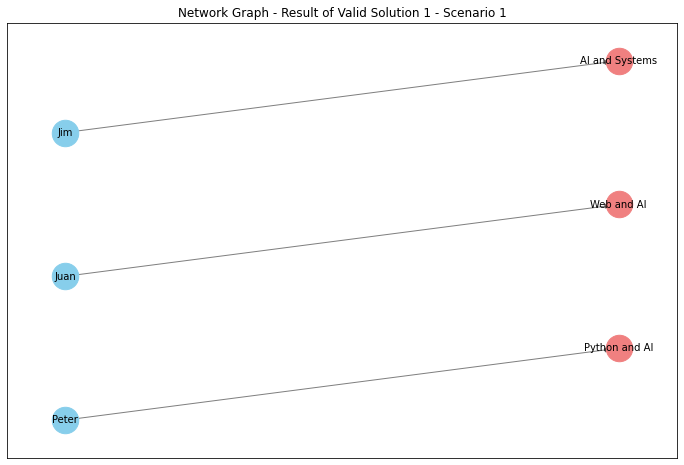

In [212]:
import networkx as nx
import matplotlib.pyplot as plt

# this is the data from the first solution acquired
solution = {'Peter': 'Python and AI', 'Juan': 'Web and AI', 'Jim': 'AI and Systems'}

# this is to create the graph
G = nx.DiGraph()

# this will be adding nodes and edges
for name, position in solution.items():
    G.add_node(name, pos=(1, len(G)))
    G.add_node(position, pos=(2, len(G)))
    G.add_edge(name, position)

# this will be extracting the positions and employees
positions = [node for node, data in G.nodes(data=True) if 'pos' in data and data['pos'][0] == 2]
names = [node for node, data in G.nodes(data=True) if 'pos' in data and data['pos'][0] == 1]

# this will be setting the positions for positions and employees
pos = nx.get_node_attributes(G, 'pos')

# this will be drawing the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, nodelist=names, node_size=700, node_color="skyblue")
nx.draw_networkx_nodes(G, pos, nodelist=positions, node_size=700, node_color="lightcoral")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

plt.title('Network Graph - Result of Valid Solution 1 - Scenario 1')
plt.show()